## Análise Turbina Eólica 

Objetivo da Análise de Dados:

Para esse exemplo nós vamos fazer uma análise de turbina eólica com Python, então vamos utilizar algumas bibliotecas para poder fazer essa análise de dados.

Vamos utilizar o pandas, que é a biblioteca mais utilizada para análise de dados e vamos utilizar o Seaborn e matplotlib que são duas bibliotecas para criação de gráficos no Python.

Com isso nós vamos fazer a importação dos dados, vamos plotar os dados em gráficos para facilitar a visualização, vamos fazer algumas análises e vamos gerar um gráfico final com a última análise visual!

O objetivo é ler o gráfico final gerado e ver quem está dentro e fora do limite aceitavel da curva obtida.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

1)  Lendo o Arquivo:

In [10]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/Hora', 'ActivePower (kW)', 'Wind Speed (m/s)', 'Curva Teórica (KWh)', 'DireçãoVento'] #troca os nomes das colunas
del turbina['DireçãoVento'] #Remove a Coluna DireçãoVento
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'], format= '%d %m %Y %H:%M') #tranforma a coluna Data/hora para o formato datetime do pandas e coloca na coluna Data/Hora
display(turbina)

,Data/Hora,ActivePower (kW),Wind Speed (m/s),Curva Teórica (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


2) Plotando os Dados em um gráfico - Real

<Axes: xlabel='Wind Speed (m/s)', ylabel='ActivePower (kW)'>

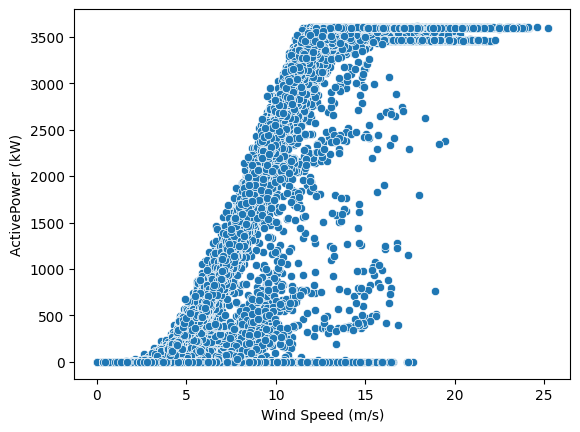

In [11]:
sns.scatterplot(data=turbina, x = 'Wind Speed (m/s)', y = 'ActivePower (kW)') #Plotando o gráfico da potencia ativa em função da velocidade do vendo


3) Plotando os Dados em um gráfico - Teoria 

<Axes: xlabel='Wind Speed (m/s)', ylabel='Curva Teórica (KWh)'>

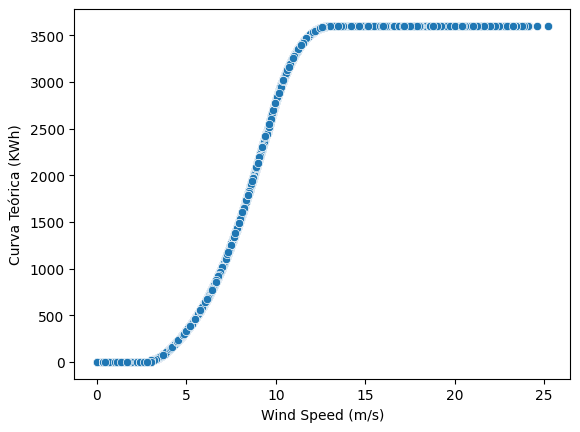

In [12]:
sns.scatterplot(data=turbina, x = 'Wind Speed (m/s)', y = 'Curva Teórica (KWh)') #Gráfico da curva teórica em função da velocidade do vento. Esse caso acontece caso tudo seja perfeito, despresando todo e qualquer erro.

4) Criando "limites aceitáveis"

In [13]:
pot_real = turbina['ActivePower (kW)'].to_list() #transforma a variáveo criada pot_real em uma lista
pot_teorica = turbina['Curva Teórica (KWh)'].to_list() #Faz o mesmo que acima

#queremos criar um gráfico de potência máxima e de potência mínima, onde a potência máxima é a potencia teórica + 5% e a mínima é a potencia teórica - 5%

pot_max = []
pot_min = []
dentro_limite = []
for item in pot_teorica:
    pot_max.append(item*1.05)
    pot_min.append(item*0.95)

for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

print(dentro_limite.count('Dentro')/len(dentro_limite) ) #37% são eficientes apenas 




0.37286760340391845


5) Adicionando lista "dentro_limite" ao dataframe:

In [14]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,ActivePower (kW),Wind Speed (m/s),Curva Teórica (KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


6) Plotando o Gráfico novamente

<Axes: xlabel='Wind Speed (m/s)', ylabel='ActivePower (kW)'>

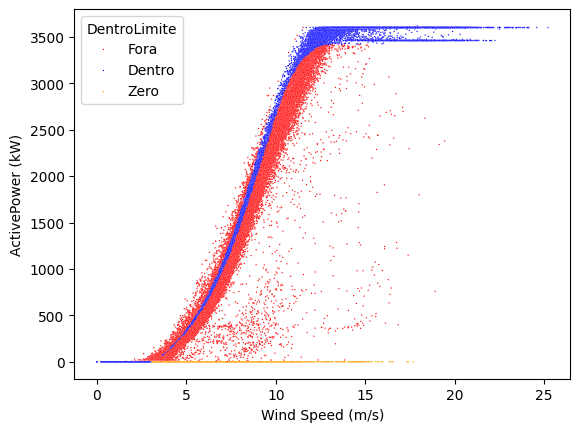

In [17]:
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
sns.scatterplot(data=turbina, x = 'Wind Speed (m/s)', y = 'ActivePower (kW)', hue = 'DentroLimite', s=1, palette= cores) 

7) Conclusão:

Com esse gráfico final gerado podemos fazer algumas indagações sobre o funcionamento da turbina, perceba que conseguimos coletar pontos "ótimos" (azuis) e conseguimos descartar pontos de ineficiencia (vermelhos). 

